#### Implementing the task into RDD

In [0]:
# Importing SparkSession from pyspark.sql
from pyspark.sql import SparkSession

In [0]:
# Create SparkSession
spark = SparkSession(sc)

In [0]:
# List files in the directory "dbfs:/filestore/tables"
dbutils.fs.ls("dbfs:/FileStore/tables")

[FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709127139000),
 FileInfo(path='dbfs:/FileStore/tables/TS021_2021_2.csv', name='TS021_2021_2.csv', size=497239, modificationTime=1710941040000),
 FileInfo(path='dbfs:/FileStore/tables/WOO385870041_auth_letter.pdf', name='WOO385870041_auth_letter.pdf', size=290212, modificationTime=1714207064000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts-1.zip', name='accounts-1.zip', size=5297592, modificationTime=1706737491000),
 FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1706714390000),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileI

In [0]:
# Copy the file clinicaltrial_2020.zip from DBFS to the local temporary file system for unzipping
dbutils.fs.cp("dbfs:/FileStore/tables/clinicaltrial_2020.zip", "file:/tmp/")


True

In [0]:
# Copy the file clinicaltrial_2021.zip from DBFS to the local temporary file system for unzipping
dbutils.fs.cp("dbfs:/FileStore/tables/clinicaltrial_2021.zip", "file:/tmp/")


True

In [0]:
# Copy the file clinicaltrial_2023.zip from DBFS to the local temporary file system for unzipping
dbutils.fs.cp("dbfs:/FileStore/tables/clinicaltrial_2023.zip", "file:/tmp/")


True

In [0]:
# Copy the file pharma.zip from DBFS to the local temporary file system for unzipping
dbutils.fs.cp("dbfs:/FileStore/tables/pharma.zip", "file:/tmp/")


True

In [0]:
# List files in the directory "File:/tmp/"
dbutils.fs.ls("File:/tmp/")

[FileInfo(path='file:/tmp/hsperfdata_root/', name='hsperfdata_root/', size=4096, modificationTime=1714573867023),
 FileInfo(path='file:/tmp/driver-daemon.pid', name='driver-daemon.pid', size=4, modificationTime=1714573801239),
 FileInfo(path='file:/tmp/clinicaltrial_2020.zip', name='clinicaltrial_2020.zip', size=10599182, modificationTime=1714581855814),
 FileInfo(path='file:/tmp/clinicaltrial_2023.zip', name='clinicaltrial_2023.zip', size=57166668, modificationTime=1714581857634),
 FileInfo(path='file:/tmp/driver-env.sh', name='driver-env.sh', size=3458, modificationTime=1714573798867),
 FileInfo(path='file:/tmp/.font-unix/', name='.font-unix/', size=4096, modificationTime=1714573761382),
 FileInfo(path='file:/tmp/python_lsp_logs/', name='python_lsp_logs/', size=4096, modificationTime=1714576119869),
 FileInfo(path='file:/tmp/custom-spark.conf', name='custom-spark.conf', size=782, modificationTime=1714573766630),
 FileInfo(path='file:/tmp/.X11-unix/', name='.X11-unix/', size=4096, mod

#### Listing the zip file without the file path using shell command

In [0]:
# Running shell command to list files in the /tmp/ directory
%sh
ls /tmp/

Rserv
RtmpZKwk9T
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2020.zip
clinicaltrial_2021.zip
clinicaltrial_2023.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.zip
python_lsp_logs
systemd-private-11ab74a9dc1643dea224117ff8b84f16-systemd-logind.service-xfJLCG
systemd-private-11ab74a9dc1643dea224117ff8b84f16-systemd-resolved.service-YL23bn
tmp.u7f6CYv2PB


#### unzipping all the files

In [0]:
# Unzipping the clinical trial and pharmaceutical data files in the /tmp/ directory
%sh
unzip /tmp/clinicaltrial_2020.zip -d /tmp/
unzip /tmp/clinicaltrial_2021.zip -d /tmp/
unzip /tmp/clinicaltrial_2023.zip -d /tmp/
unzip /tmp/pharma.zip -d /tmp/


Archive:  /tmp/clinicaltrial_2020.zip
  inflating: /tmp/clinicaltrial_2020.csv  
Archive:  /tmp/clinicaltrial_2021.zip
  inflating: /tmp/clinicaltrial_2021.csv  
Archive:  /tmp/clinicaltrial_2023.zip
  inflating: /tmp/clinicaltrial_2023.csv  
Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
# List files in the directory "dbfs:/filestore/tables"
dbutils.fs.ls("dbfs:/FileStore/tables")

[FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709127139000),
 FileInfo(path='dbfs:/FileStore/tables/TS021_2021_2.csv', name='TS021_2021_2.csv', size=497239, modificationTime=1710941040000),
 FileInfo(path='dbfs:/FileStore/tables/WOO385870041_auth_letter.pdf', name='WOO385870041_auth_letter.pdf', size=290212, modificationTime=1714207064000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts-1.zip', name='accounts-1.zip', size=5297592, modificationTime=1706737491000),
 FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1706714390000),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileI

In [0]:
# Create a directory named "table" within the "FileStore" directory in DBFS
dbutils.fs.mkdirs("dbfs:/FileStore/table")


True

In [0]:
# Move the file "clinicaltrial_2020.csv" from the local file system (/tmp) to the specified location in DBFS (/FileStore/table)
dbutils.fs.mv("file:/tmp/clinicaltrial_2020.csv", "dbfs:/FileStore/table/clinicaltrial_2020.csv")


True

In [0]:
# Move the file "clinicaltrial_2021.csv" from the local file system (/tmp) to the specified location in DBFS (/FileStore/table)
dbutils.fs.mv("file:/tmp/clinicaltrial_2021.csv", "dbfs:/FileStore/table/clinicaltrial_2021.csv")


True

In [0]:
# Move the file "clinicaltrial_2023.csv" from the local file system (/tmp) to the specified location in DBFS (/FileStore/table)
dbutils.fs.mv("file:/tmp/clinicaltrial_2023.csv", "dbfs:/FileStore/table/clinicaltrial_2023.csv")


True

In [0]:
# Move the file "pharma.csv" from the local file system (/tmp) to the specified location in DBFS (/FileStore/table)
dbutils.fs.mv("file:/tmp/pharma.csv", "dbfs:/FileStore/table/pharma.csv")


True

In [0]:
# Defining the File Path
clinicaltrial_2020 = 'dbfs:/FileStore/table/clinicaltrial_2020.csv'
clinicaltrial_2021 = 'dbfs:/FileStore/table/clinicaltrial_2021.csv'
clinicaltrial_2023 = 'dbfs:/FileStore/table/clinicaltrial_2023.csv'
pharma = 'dbfs:/FileStore/table/pharma.csv'

In [0]:
def clean_and_split(line):
    # Remove trailing commas
    cleaned_line = line.rstrip(',')
    # Replace double quotes with an empty string
    cleaned_line = cleaned_line.replace('"', '')
    # Split the line into fields
    fields = cleaned_line.split('\t')
    # Fill missing values if required for the 14 columns and append
    while len(fields) < 14:
        fields.append('')
    return fields

In [0]:
#reading text file(s) into an RDD.
clinicaltrial_2023_RDD = sc.textFile(clinicaltrial_2023)

In [0]:
# Assuming clinicaltrial_2023_RDD contains the RDD data
cleaned_clinicaltrial_2023_RDD = clinicaltrial_2023_RDD.map(clean_and_split)


In [0]:
# Extracting the header from the cleaned clinical trial data RDD
header = cleaned_clinicaltrial_2023_RDD.first()

In [0]:
#cleaned_clinicaltrial_2023_RDD take 20
cleaned_clinicaltrial_2023_RDD.take(20)

[['Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion'],
 ['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G., Depression, Psychosis, Personality Disorder, Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascular Functio

In [0]:
# cleaned_clinicaltrial_2023_RDD header display
header

['Id',
 'Study Title',
 'Acronym',
 'Status',
 'Conditions',
 'Interventions',
 'Sponsor',
 'Collaborators',
 'Enrollment',
 'Funder Type',
 'Type',
 'Study Design',
 'Start',
 'Completion']

In [0]:
# Collecting the cleaned clinical trial data for further analysis
clinical_2023 = cleaned_clinicaltrial_2023_RDD.filter(lambda row:row != header)
clinical_2023.collect()

[['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G., Depression, Psychosis, Personality Disorder, Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascular Function|Cognition',
  'OTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB',
  'McMaster University',
  "Alzheimer's Society of Brant, Haldimand Norfolk, Hamilton Halton",
  '30.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocat

#### QUESTION 1

In [0]:
# Counting distinct studies
distinct_study_count = clinical_2023.map(lambda x: x[0]).distinct().count()

# Output the count of distinct studies
print("Number of distinct studies in the dataset:", distinct_study_count)

Number of distinct studies in the dataset: 483422


#### QUESTION 2

In [0]:
# The clinical_2023 RDD contains the cleaned data and the "Type" column index is known
type_column_index = 10

# Grouping the data by study type and counting occurrences
type_counts = clinical_2023.map(lambda row: (row[type_column_index], 1)).reduceByKey(lambda a, b: a + b)

# Sorting the result by frequency in descending order
sorted_type_counts = type_counts.map(lambda x: (x[1], x[0])).sortByKey(ascending=False)

# Outputting the types along with their frequencies
print("Types of studies in the dataset along with frequencies (from most frequent to least frequent):")
for count, study_type in sorted_type_counts.collect():
    print(study_type, ":", count)


Types of studies in the dataset along with frequencies (from most frequent to least frequent):
INTERVENTIONAL : 371382
OBSERVATIONAL : 110221
EXPANDED_ACCESS : 928
 : 891


#### QUESTION 3

In [0]:
# clinical_2023 RDD contains the cleaned data and the "Conditions" column index is known
conditions_column_index = 4

# Splitting multiple conditions if they are separated by a delimiter like pipeline "|"
condition_counts = clinical_2023.flatMap(lambda row: row[conditions_column_index].split('|'))

# Counting occurrences of each condition
condition_counts = condition_counts.map(lambda condition: (condition.strip(), 1)).reduceByKey(lambda a, b: a + b)

# Sorting the result by frequency in descending order
sorted_condition_counts = condition_counts.map(lambda x: (x[1], x[0])).sortByKey(ascending=False)

# Taking the top 5 conditions
top_5_conditions = sorted_condition_counts.take(5)

# Outputting the top 5 conditions along with their frequencies
print("Top 5 conditions with their frequencies:")
for count, condition in top_5_conditions:
    print(condition, ":", count)


Top 5 conditions with their frequencies:
Healthy : 9731
Breast Cancer : 7502
Obesity : 6549
Stroke : 4072
Hypertension : 4020


#### QUESTION 4

In [0]:
# Read the pharmaceutical companies data
pharma = sc.textFile(pharma)

# Map and split each line by comma
pharma_split = pharma.map(lambda line: line.split(','))

# Filter out the header (assuming it's the first line)
header_pharma = pharma_split.first()
pharma_data_filtered = pharma_split.filter(lambda line: line != header_pharma)



In [0]:
# Displaying the header
header_pharma

['"Company"',
 '"Parent_Company"',
 '"Penalty_Amount"',
 '"Subtraction_From_Penalty"',
 '"Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting"',
 '"Penalty_Year"',
 '"Penalty_Date"',
 '"Offense_Group"',
 '"Primary_Offense"',
 '"Secondary_Offense"',
 '"Description"',
 '"Level_of_Government"',
 '"Action_Type"',
 '"Agency"',
 '"Civil/Criminal"',
 '"Prosecution_Agreement"',
 '"Court"',
 '"Case_ID"',
 '"Private_Litigation_Case_Title"',
 '"Lawsuit_Resolution"',
 '"Facility_State"',
 '"City"',
 '"Address"',
 '"Zip"',
 '"NAICS_Code"',
 '"NAICS_Translation"',
 '"HQ_Country_of_Parent"',
 '"HQ_State_of_Parent"',
 '"Ownership_Structure"',
 '"Parent_Company_Stock_Ticker"',
 '"Major_Industry_of_Parent"',
 '"Specific_Industry_of_Parent"',
 '"Info_Source"',
 '"Notes"']

In [0]:
# Display the first few lines of the filtered data for verification
pharma_data_filtered.take(5)

[['"Abbott Laboratories"',
  '"Abbott Laboratories"',
  '"$5',
  '475',
  '000"',
  '"$0"',
  '"$5',
  '475',
  '000"',
  '"2013"',
  '"20131227"',
  '"government-contracting-related offenses"',
  '"False Claims Act and related"',
  '"kickbacks and bribery"',
  '"Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s carotid',
  ' biliary and peripheral vascular products."',
  '"federal"',
  '"agency action"',
  '"Justice Department Civil Division"',
  '"civil"',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '"USA"',
  '"Illinois"',
  '"publicly traded"',
  '"ABT"',
  '"pharmaceuticals"',
  '"pharmaceuticals"',
  '"https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians"',
  '""'],
 ['"Abbott Laboratories Inc."',
  '"AbbVie"',
  '"$1',
  '500',
  '000',
  '000"',
  '

In [0]:
# Define indices for company and sponsor columns
company_index = 1
sponsor_index = 6



In [0]:
# Extract sponsors from the clinical trial data
sponsors = clinical_2023.map(lambda col: col[sponsor_index])



In [0]:
# Extract pharmaceutical companies 
pharma_companies = pharma.map(lambda col: col[company_index]) \
                         .map(lambda x: x.strip('\"'))  
pharma_broadcast = sc.broadcast(pharma_companies.collect())



In [0]:
from operator import add

In [0]:
# Filter out non-pharmaceutical sponsors, count occurrences, and select top 10
filtered_sponsors = sponsors.filter(lambda x: x not in pharma_broadcast.value) \
                            .map(lambda x: (x, 1)) \
                            .reduceByKey(add) \
                            .sortBy(lambda x: x[1], ascending=False) \
                            .take(10)

In [0]:
# Showing Filtered sponsors
filtered_sponsors

[('GlaxoSmithKline', 3482),
 ('National Cancer Institute (NCI)', 3410),
 ('Assiut University', 3335),
 ('Pfizer', 3045),
 ('AstraZeneca', 3024),
 ('Cairo University', 3023),
 ('Assistance Publique - Hôpitaux de Paris', 2951),
 ('Mayo Clinic', 2766),
 ('M.D. Anderson Cancer Center', 2702),
 ('Novartis Pharmaceuticals', 2393)]

#### QUESTION 5

In [0]:
import matplotlib.pyplot as plt

year = '2023'

# Filter out rows with completion dates in 2023 and status as "COMPLETED", map completion dates to months, 
# Count the number of completed studies for each month
completed_studies_2023 = clinical_2023.map(lambda col: [col[x] for x in [3, 13]]).filter(lambda x: x[0] == 'COMPLETED').map(lambda x: x[1]).filter(lambda x: x != '').map(lambda x: tuple(x.split('-'))).filter(lambda x: x[0] == year).map(lambda x: (x[1], 1)).reduceByKey(lambda x, y: x + y).sortByKey()

In [0]:
# Count the number of completed studies for each month
completed_studies_2023.collect()

[('01', 1494),
 ('02', 1272),
 ('03', 1552),
 ('04', 1324),
 ('05', 1415),
 ('06', 1619),
 ('07', 1360),
 ('08', 1230),
 ('09', 1152),
 ('10', 1058),
 ('11', 909),
 ('12', 1082)]

In [0]:

# Extract months and corresponding study counts for plotting
months = completed_studies_2023.map(lambda x: x[0]).collect()
study_counts = completed_studies_2023.map(lambda x: x[1]).collect()

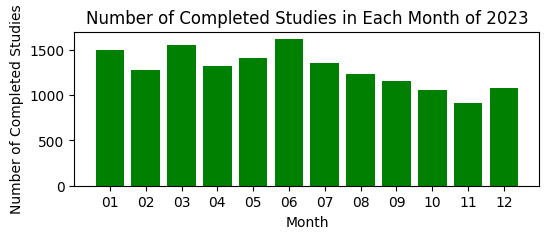

In [0]:
# Plotting
plt.figure(figsize=(6, 2))
plt.bar(months, study_counts, color='green')
plt.title('Number of Completed Studies in Each Month of 2023')
plt.xlabel('Month')
plt.ylabel('Number of Completed Studies')
plt.show()

#### Further Analysis 2: Sponsor Performance by Country (RDD)

In [0]:
# Define indices for sponsor and country columns
sponsor_index = 6
country_index = 7

# Extract sponsors and countries from the clinical trial data
sponsors_countries = clinical_2023.map(lambda col: (col[sponsor_index], col[country_index]))

# Filter out empty or null countries
filtered_sponsors_countries = sponsors_countries.filter(lambda x: x[1] != '' and x[1] is not None)

# Map each sponsor-country pair to a tuple of (sponsor, country, 1)
sponsor_country_counts = filtered_sponsors_countries.map(lambda x: ((x[0], x[1]), 1))

# Reduce by key to count occurrences of each sponsor-country pair
sponsor_country_counts = sponsor_country_counts.reduceByKey(lambda a, b: a + b)

# Group by sponsor and aggregate the counts for each country
sponsor_country_totals = sponsor_country_counts.map(lambda x: (x[0][0], (x[0][1], x[1]))).groupByKey()

# Calculate total studies sponsored by each sponsor
sponsor_totals = sponsor_country_totals.mapValues(lambda x: sum(count for _, count in x))

# Calculate the top 5 sponsors by the number of studies sponsored
top_sponsors = sponsor_totals.takeOrdered(5, key=lambda x: -x[1])

# Output the top 5 sponsors and their total studies
print("Top 5 sponsors by the number of studies sponsored:")
for sponsor, total_studies in top_sponsors:
    print(f"{sponsor}: {total_studies}")

# Calculate the top performing countries for each sponsor
top_performing_countries = sponsor_country_totals.mapValues(lambda x: sorted(x, key=lambda y: -y[1])[:3])

# Output the top performing countries for each sponsor
print("\nTop performing countries for each sponsor:")
for sponsor, countries in top_performing_countries.collect():
    print(f"\nSponsor: {sponsor}")
    for country, studies in countries:
        print(f"Country: {country}, Studies: {studies}")


Top 5 sponsors by the number of studies sponsored:
M.D. Anderson Cancer Center: 1766
Massachusetts General Hospital: 1265
University of California, San Francisco: 1126
Memorial Sloan Kettering Cancer Center: 1039
Mayo Clinic: 1024

Top performing countries for each sponsor:

Sponsor: M.D. Anderson Cancer Center
Country: National Cancer Institute (NCI), Studies: 868
Country: Celgene Corporation, Studies: 32
Country: Novartis, Studies: 31

Sponsor: University of Colorado, Denver
Country: National Cancer Institute (NCI), Studies: 48
Country: National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK), Studies: 44
Country: National Heart, Lung, and Blood Institute (NHLBI), Studies: 26

Sponsor: Jun Zhu
Country: Peking University First Hospital|Tianjin Medical University Cancer Hospital|Zhejiang Cancer Hospital|Heilongjiang Cancer Hospital|Sipai(Beijing)Network Technology Co Ltd, Studies: 1
Country: Peking University First Hospital|Peking University People's Hospital|Peking Uni

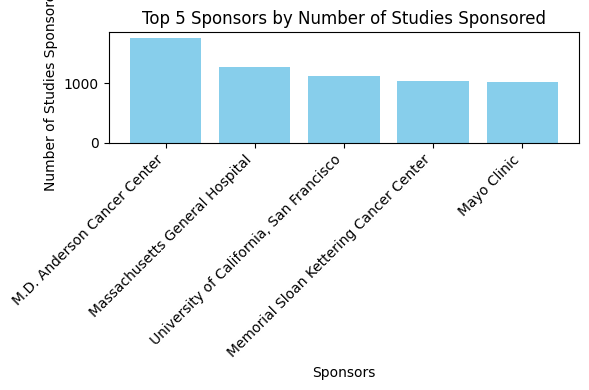

In [0]:
# Extract sponsors and their total studies for plotting
sponsors = [sponsor for sponsor, _ in top_sponsors]
total_studies = [total for _, total in top_sponsors]

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(sponsors, total_studies, color='skyblue')
plt.xlabel('Sponsors')
plt.ylabel('Number of Studies Sponsored')
plt.title('Top 5 Sponsors by Number of Studies Sponsored')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()